# ch04.05 Wave Net

* 날짜:
* 이름:

## 학습내용
    - Audio data에 대해 이해한다.
    - 머신러닝 방법으로 접근하여 문제를 해결해 본다.
    - 딥러닝 네트워크를 이용해 문제를 해결한다.
    - waveNet, yamNet 등 딥러닝 알고리즘을 적용한다.



In [30]:
import os
import shutil
import zipfile
import kaggle
import seaborn as sns
import set_matplotlib_hangul
import matplotlib.pyplot as plt

## 데이터셋 - Kaggle GTZAN Dataset 
---

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification



* api 파일을 받아옴 (.json)
* user 의 .kaggle 폴더에 넣음

### 데이터셋 다운로드

In [4]:
! kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification -


  0%|          | 0.00/1.21G [00:00<?, ?B/s]
  0%|          | 1.00M/1.21G [00:00<03:27, 6.27MB/s]
  0%|          | 3.00M/1.21G [00:00<02:16, 9.50MB/s]
  0%|          | 4.00M/1.21G [00:00<02:17, 9.45MB/s]
  0%|          | 6.00M/1.21G [00:00<01:57, 11.0MB/s]
  1%|          | 8.00M/1.21G [00:00<02:02, 10.6MB/s]
  1%|          | 10.0M/1.21G [00:01<01:57, 11.0MB/s]
  1%|          | 12.0M/1.21G [00:01<01:54, 11.3MB/s]
  1%|1         | 14.0M/1.21G [00:01<01:57, 11.0MB/s]
  1%|1         | 16.0M/1.21G [00:01<01:51, 11.6MB/s]
  1%|1         | 18.0M/1.21G [00:01<02:01, 10.5MB/s]
  2%|1         | 20.0M/1.21G [00:01<01:54, 11.2MB/s]
  2%|1         | 22.0M/1.21G [00:02<01:56, 11.0MB/s]
  2%|1         | 24.0M/1.21G [00:02<01:49, 11.6MB/s]
  2%|2         | 26.0M/1.21G [00:02<01:53, 11.2MB/s]
  2%|2         | 28.0M/1.21G [00:02<01:52, 11.3MB/s]
  2%|2         | 30.0M/1.21G [00:02<01:55, 11.0MB/s]
  3%|2         | 32.0M/1.21G [00:03<01:53, 11.2MB/s]
  3%|2         | 34.0M/1.21G [00:03<01:51, 11.4MB/s]
 

### 데이터 폴더로 이동

In [7]:
shutil.move("gtzan-dataset-music-genre-classification.zip", "D:/Dataset/dataset/Kaggle/")

'D:/Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification.zip'

### 압축해제

In [10]:
with zipfile.ZipFile("D:/Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification.zip","r") as zip_ref:
    zip_ref.extractall("D:/Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification")

### 압축파일 제거

In [12]:
if os.path.isfile("D:/Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification.zip"):
    os.remove("D:/Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification.zip")
    print("File has been deleted")
else:
    print("File does not exist")

File has been deleted


## **| EDA**

In [13]:
import pandas as pd
file_path = "D:Dataset/dataset/Kaggle/gtzan-dataset-music-genre-classification/Data/"
df = pd.read_csv(file_path+"features_30_sec.csv")
display(df)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


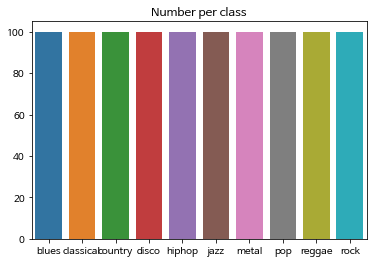

In [15]:
# 예측해야할 클래스
import matplotlib.pyplot as plt
import seaborn as sns
class_count = df["label"].value_counts()
plt.title("Number per class")
sns.barplot(x=class_count.index, y=class_count.values);

(array([305., 651.,   7.,   6.,   4.,  10.,   5.,   2.,   0.,  10.]),
 array([660000. , 661580.8, 663161.6, 664742.4, 666323.2, 667904. ,
        669484.8, 671065.6, 672646.4, 674227.2, 675808. ]),
 <BarContainer object of 10 artists>)

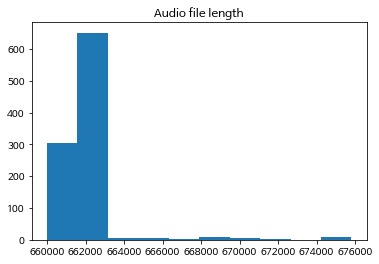

In [19]:
# 음성파일의 길이
plt.title("Audio file length")
plt.hist(df["length"])

특성 개수 57


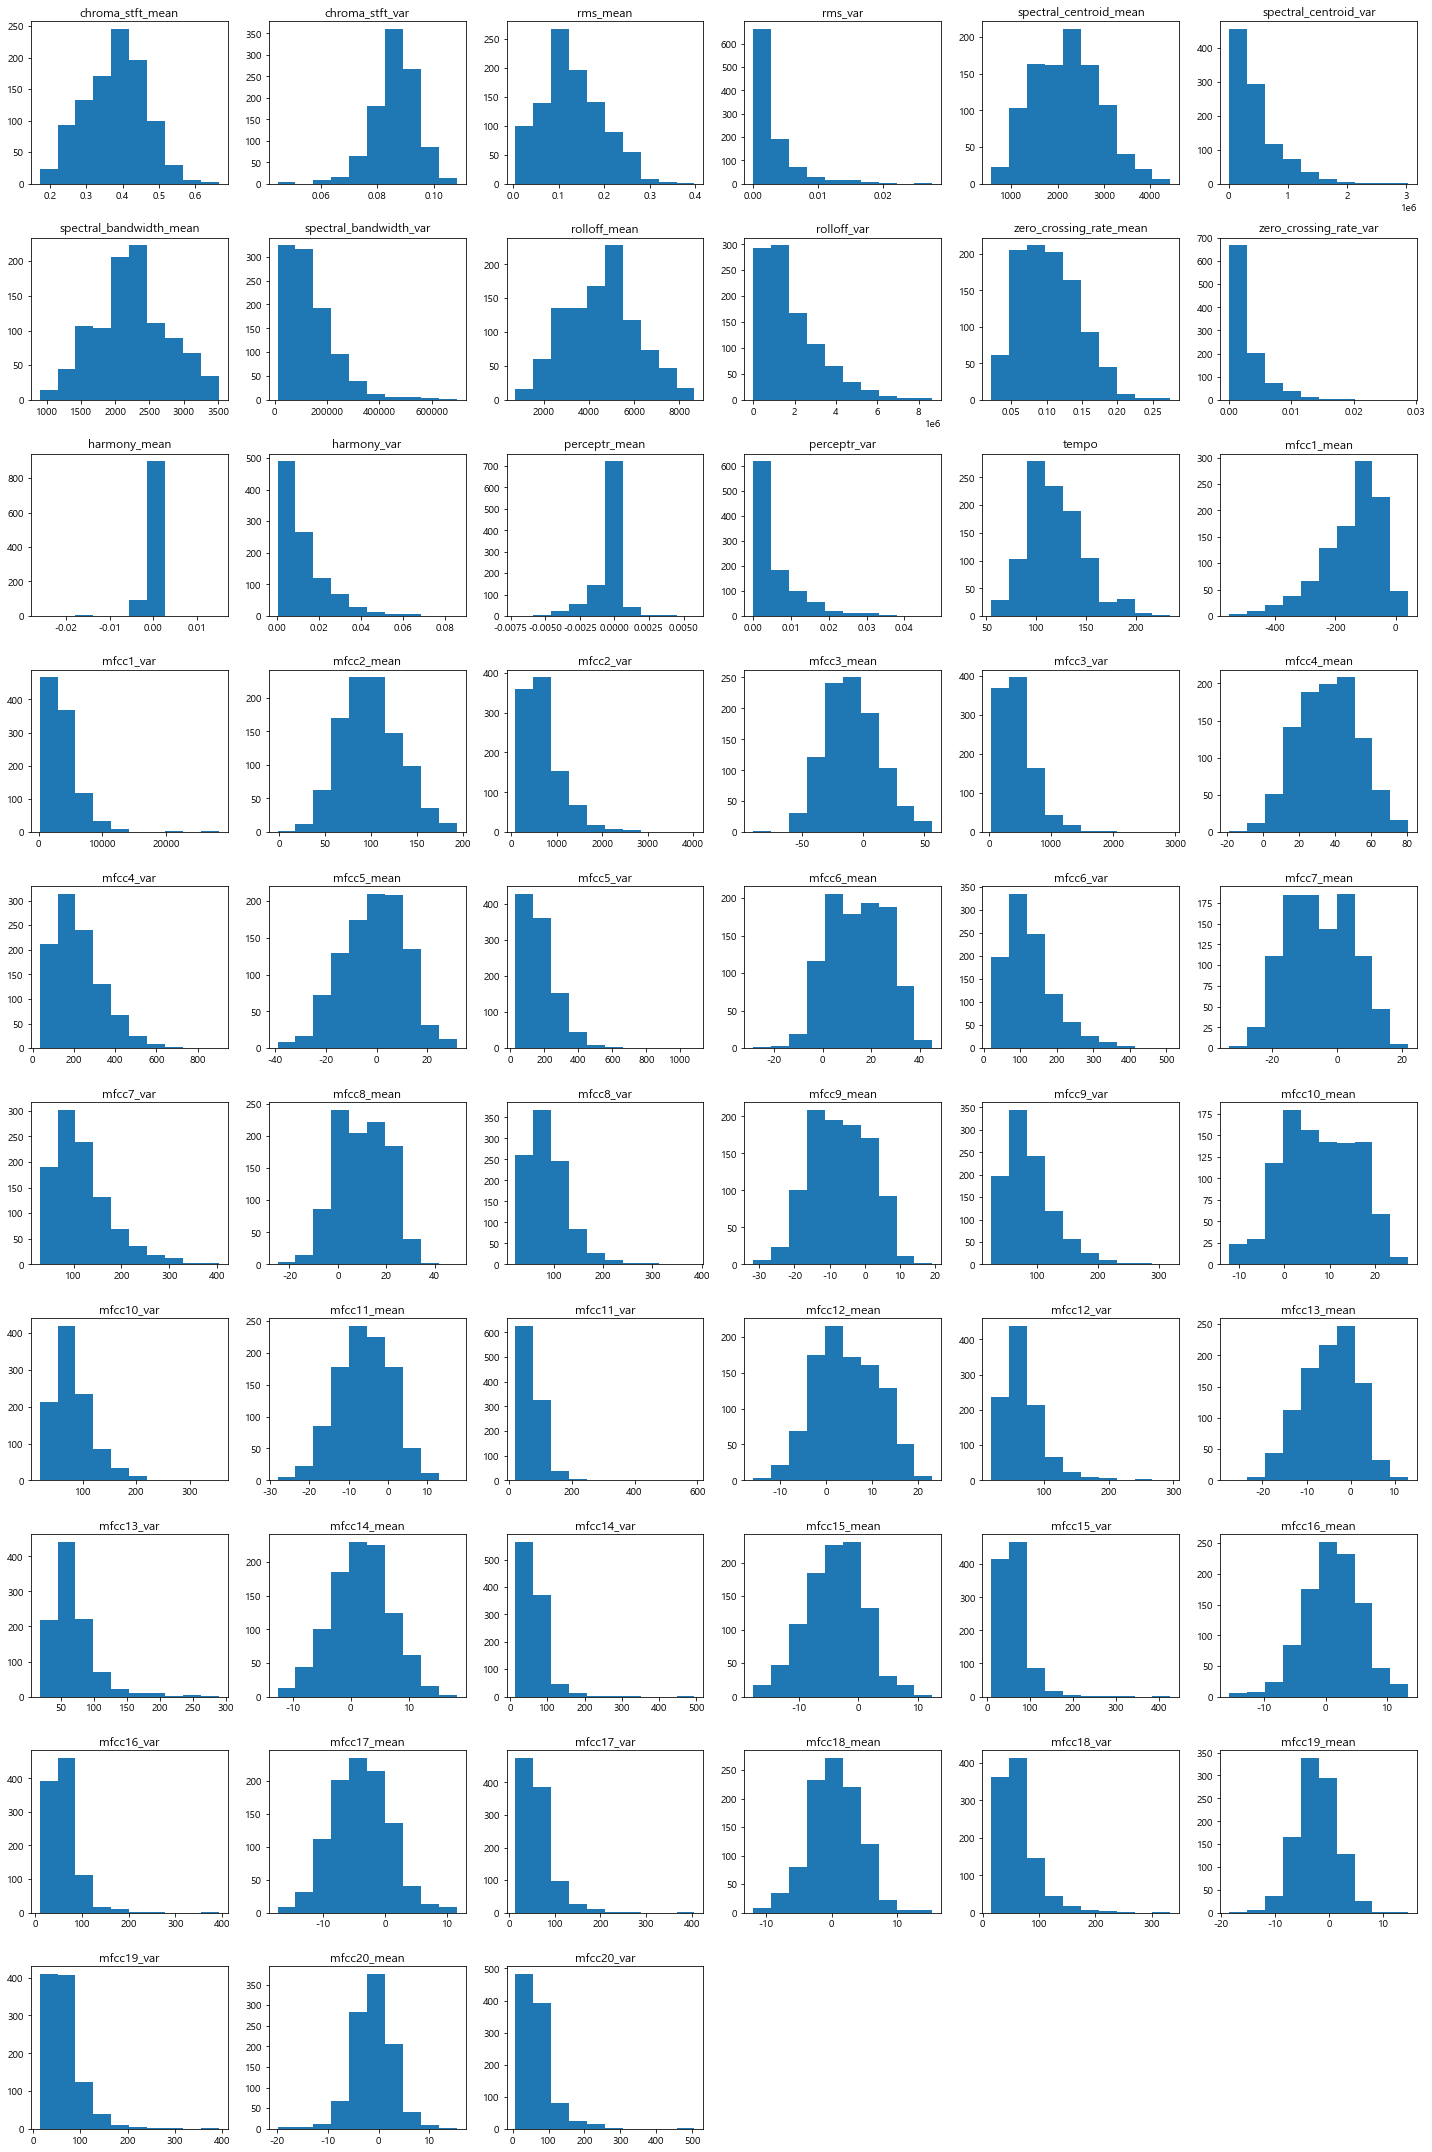

In [31]:
# 특성 분포
print("특성 개수", len(df.columns[2:-1]))
plt.figure(figsize=(20,30))
for i, col in enumerate(df.columns[2:-1]):
    plt.subplot(10,6, i+1)
    plt.title(col)
    plt.hist(df[col])
    plt.tight_layout()

## 머신러닝 접근 방법 (features)
---

### **| 파라미터 추가**


### **| 전처리**


In [32]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["le_label"] = le.fit_transform(df["label"])
print(le.classes_)
display(df)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,le_label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock,9
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock,9
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock,9
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock,9


In [33]:
x = df.drop(columns=["filename", "length", "label", "le_label"])
y = df["le_label"]
x.shape, y.shape

((1000, 57), (1000,))

In [35]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, stratify=y, random_state=0)
print("x_train.shape\t: ", x_train.shape)
print("x_test.shape\t: ", x_test.shape)
print("y_train.shape\t: ", y_train.shape)
print("y_test.shape\t: ", y_test.shape)

x_train.shape	:  (900, 57)
x_test.shape	:  (100, 57)
y_train.shape	:  (900,)
y_test.shape	:  (100,)


In [119]:
# x 정규화
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print("x_train.shape\t: ", x_train.shape)
print("x_test.shape\t: ", x_test.shape)

x_train.shape	:  (900, 57)
x_test.shape	:  (100, 57)


### **| 학습 - XGBoost**

In [120]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier(n_estimators=1000)
xgb.fit(x_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=1000, n_jobs=0,
                num_parallel_tree=1000, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=None, ...)

Test Acc	: 0.74 


Classfication_report :
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       1.00      0.90      0.95        10
           2       0.67      1.00      0.80        10
           3       0.70      0.70      0.70        10
           4       0.50      0.40      0.44        10
           5       0.89      0.80      0.84        10
           6       0.69      0.90      0.78        10
           7       0.88      0.70      0.78        10
           8       0.54      0.70      0.61        10
           9       1.00      0.50      0.67        10

    accuracy                           0.74       100
   macro avg       0.77      0.74      0.74       100
weighted avg       0.77      0.74      0.74       100



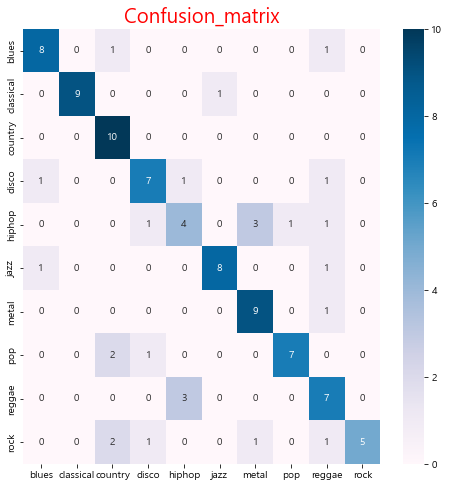

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from termcolor import colored

y_pred = xgb.predict(x_test)
print(colored("Test Acc\t:","red"),accuracy_score(y_test, y_pred),"\n\n")
print(colored("Classfication_report :\n", "red"), classification_report(y_test, y_pred))
plt.figure(figsize=(8,8))
plt.title("Confusion_matrix", fontsize=20, color="red")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="PuBu", xticklabels=le.classes_, yticklabels=le.classes_);

### **| 학습 - DNN**

In [124]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [206]:
model = Sequential()
model.add(Dense(60, input_dim=57, activation='leaky_relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dense(30, activation='leaky_relu', kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.HeNormal()))
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["acc"])
ckp = tf.keras.callbacks.ModelCheckpoint("model/ckp.h5", save_best_only=True, monitor="val_acc")
lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, monitor="val_loss", patience=5, cooldown=3)
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 60)                3480      
                                                                 
 dense_93 (Dense)            (None, 30)                1830      
                                                                 
 dense_94 (Dense)            (None, 10)                310       
                                                                 
Total params: 5,620
Trainable params: 5,620
Non-trainable params: 0
_________________________________________________________________


In [207]:
epochs_hist = model.fit(x_train, y_train, epochs=500, batch_size=50, validation_split=0.1, callbacks=[ckp, lr], verbose=0)

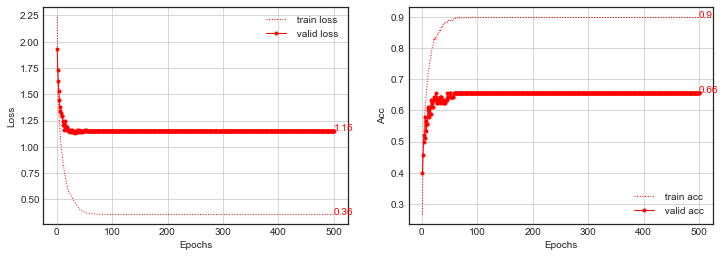

In [208]:
from Myfunc import show_lcurve
show_lcurve([epochs_hist], [""], x_itv=100)

4/4 [==============================] - 0s 1ms/step
Test Acc	: 0.78 




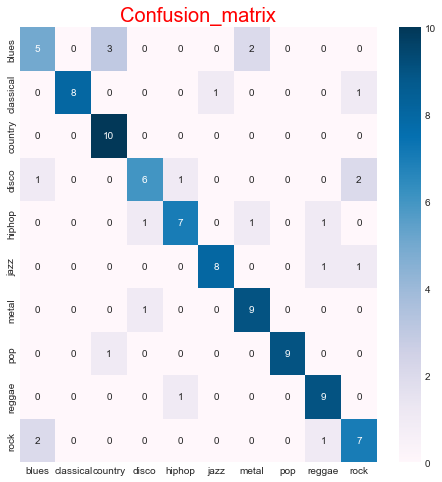

In [209]:
model = tf.keras.models.load_model("model/ckp.h5")
y_pred = model.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)
print(colored("Test Acc\t:","red"),accuracy_score(y_test, y_pred),"\n\n")
plt.figure(figsize=(8,8))
plt.title("Confusion_matrix", fontsize=20, color="red")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="PuBu", xticklabels=le.classes_, yticklabels=le.classes_);

## 딥러닝 접근 방법(Audio 원 데이터)
---